# Projeto Técnicas de programação I

## Análise exploratória de Dados/Pandas


### 1 - Carregando os arquivos de Investimento1, Investimento2 e Cadastro. Além da exibir a quantidade de linhas, colunas, e, informações de estatística descritiva de cada um desses DataFrames.

In [290]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


In [291]:
invest_1 = pd.read_csv("./dataset/investimento_parte1.csv", sep=',') # Carregamento do CSV
invest_2 = pd.read_csv("./dataset/investimento_parte2.csv", sep=',') # Carregamento do CSV
cadastro = pd.read_csv("./dataset/cadastro.csv", sep=',')            # Carregamento do CSV


print(f"O DataFrame de Investimentos 1 possui {invest_1.shape[0]} linhas e {invest_1.shape[1]} colunas")
print(f"O DataFrame de Investimentos 2 possui {invest_2.shape[0]} linhas e {invest_2.shape[1]} colunas")
print(f"O DataFrame de Cadastros possui {cadastro.shape[0]} linhas e {cadastro.shape[1]} colunas")

O DataFrame de Investimentos 1 possui 20000 linhas e 12 colunas
O DataFrame de Investimentos 2 possui 24052 linhas e 12 colunas
O DataFrame de Cadastros possui 38754 linhas e 9 colunas


In [292]:
print('-'*29)
print('DataFrame de Investimentos 1')
print('-'*29)
print(invest_1.dtypes)

-----------------------------
DataFrame de Investimentos 1
-----------------------------
id          object
Salario     object
Perfil      object
Ativo01    float64
Ativo02    float64
Ativo03    float64
Ativo04    float64
Ativo05    float64
Ativo06    float64
Ativo07    float64
Nota1      float64
Nota2      float64
dtype: object


In [293]:
print('-'*29)
print('DataFrame de Investimentos 1')
print('-'*29)
display(invest_1.head(5))

-----------------------------
DataFrame de Investimentos 1
-----------------------------


,id,Salario,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
0,id0011529,$2.25,Agressivo,1311.38,NaN,NaN,29267.48,4993.30,NaN,506.40,73.007216,30.025005
1,id0030644,$24.57,Agressivo,1007.38,4846.66,2717.82,12532.15,4282.98,NaN,499.93,20.000123,29.477728
2,id0019311,$367.53,Moderado,1128.99,4668.94,3092.60,9777.77,4246.30,2007.83,509.50,24.901450,49.659852
3,id0036705,$23.26,Moderado,1185.26,4782.17,2669.05,14047.87,6026.84,2064.09,489.82,14.246718,29.271206
4,id0001368,$6.31,Conservador,957.64,5585.52,NaN,5067.08,4030.51,2022.61,507.39,5.922253,11.840601


In [294]:
print('-'*29)
print('DataFrame de Investimentos 1')
print('-'*29)
display(invest_1.describe())

-----------------------------
DataFrame de Investimentos 1
-----------------------------


,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
count,15012.000000,16857.000000,16760.000000,13799.000000,16829.000000,9895.000000,20000.000000,18469.000000,18954.000000
mean,1125.757681,5148.243110,3139.165891,15136.440041,5281.172070,2317.491907,500.093471,50.098208,50.174113
std,217.080495,398.701012,394.175941,6946.544888,792.562796,239.180603,10.012402,28.952396,28.832285
min,800.070000,4500.090000,2500.010000,5000.810000,4000.140000,2000.040000,462.930000,0.003143,0.007864
25%,954.525000,4833.260000,2829.085000,9678.280000,4654.050000,2127.395000,493.320000,25.020373,25.134177
50%,1093.145000,5107.230000,3096.020000,14070.350000,5197.220000,2270.870000,500.130000,50.119452,50.242237
75%,1262.155000,5407.630000,3395.200000,19424.205000,5800.460000,2455.335000,506.892500,75.238847,74.877627
max,2068.590000,6817.340000,5212.550000,47467.730000,9052.260000,3610.050000,542.050000,99.996659,99.991247


In [295]:
print('-'*29)
print('DataFrame de Investimentos 2')
print('-'*29)
print(invest_2.dtypes)

-----------------------------
DataFrame de Investimentos 2
-----------------------------
id          object
Salario     object
Perfil      object
Ativo01    float64
Ativo02    float64
Ativo03    float64
Ativo04    float64
Ativo05    float64
Ativo06    float64
Ativo07    float64
Nota1      float64
Nota2      float64
dtype: object


In [296]:
print('-'*29)
print('DataFrame de Investimentos 2')
print('-'*29)
display(invest_2.head(5))

-----------------------------
DataFrame de Investimentos 2
-----------------------------


,id,Salario,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
0,id0000859,$51483.81,Agressivo,1273.95,5080.37,3565.44,NaN,5635.72,NaN,513.38,47.599278,7.057028
1,id0022202,$457.43,Conservador,1121.09,4927.51,3911.58,5511.7,5593.40,NaN,497.28,37.353757,61.516665
2,id0002056,$93245.46,Moderado,NaN,5283.71,2914.76,NaN,4707.33,NaN,499.06,98.895407,45.197866
3,id0005674,$3044.00,Agressivo,1353.76,5827.28,2998.24,16341.7,4712.65,2007.44,515.10,50.658089,65.660735
4,id0004777,$880.30,Agressivo,NaN,5695.77,3525.98,NaN,4147.29,NaN,506.77,72.993882,55.530580


In [297]:
print('-'*29)
print('DataFrame de Investimentos 2')
print('-'*29)
display(invest_2.describe())

-----------------------------
DataFrame de Investimentos 2
-----------------------------


,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
count,17994.000000,20245.000000,20249.000000,16685.000000,20211.000000,11932.000000,24052.000000,22172.000000,22810.000000
mean,1129.080980,5146.837462,3141.053559,15163.012785,5286.059975,2320.358866,500.019744,49.654722,49.973616
std,219.747037,398.977137,396.580165,6993.738051,796.892363,241.972481,9.977632,28.913037,28.935261
min,800.010000,4500.050000,2500.010000,5000.930000,4000.250000,2000.040000,462.930000,0.003143,0.003341
25%,955.027500,4831.890000,2827.840000,9621.090000,4654.300000,2128.885000,493.260000,24.767894,25.015850
50%,1096.395000,5101.630000,3097.070000,14090.430000,5199.610000,2270.135000,500.120000,49.198346,49.747230
75%,1269.760000,5409.750000,3403.260000,19517.340000,5805.705000,2464.085000,506.760000,74.880010,75.164789
max,2143.050000,6990.260000,4899.990000,48744.740000,9052.260000,3639.650000,542.300000,99.991343,99.999535


In [298]:
print('-'*22)
print('DataFrame de Cadastro')
print('-'*22)
print(invest_2.dtypes)

----------------------
DataFrame de Cadastro
----------------------
id          object
Salario     object
Perfil      object
Ativo01    float64
Ativo02    float64
Ativo03    float64
Ativo04    float64
Ativo05    float64
Ativo06    float64
Ativo07    float64
Nota1      float64
Nota2      float64
dtype: object


In [299]:
print('-'*19)
print('DataFrame Cadastro')
print('-'*19)
display(cadastro.head(3))

-------------------
DataFrame Cadastro
-------------------


,id,Nome,Sexo,Nasc,Idade,Email,Lat_long,Job,Estado
0,id0000001,Eunice Hellen do Vale,Fem,1970-11-12,51,djones@yahoo.com,"(Decimal('24.7024355'), Decimal('-28.038258'))",Technical author,TO
1,id0000002,Sebastião Castelo Branco Júnior,Masc,2019-12-10,2,barnesandrea@yahoo.com,"(Decimal('21.8589875'), Decimal('122.830566'))","Biochemist, clinical",DF
2,id0000003,Romildo Fábio de Carvalho,Masc,2015-12-28,6,walkermichael@yahoo.com,"(Decimal('-28.2161525'), Decimal('97.140529'))","Development worker, international aid",DF


In [300]:
print('-'*19)
print('DataFrame Cadastro')
print('-'*19)
display(cadastro.describe())


-------------------
DataFrame Cadastro
-------------------


,Idade
count,38754.000000
mean,25.716855
std,14.918449
min,0.000000
25%,13.000000
50%,26.000000
75%,39.000000
max,51.000000


### 2 - Concatenando os DataFrames de Investimentos em um único, e avaliando seu formato.

In [301]:
df = pd.concat([invest_1, invest_2], axis=0)
print(f"O DataFrame tem {df.shape[0]} linhas e {df.shape[1]} colunas")

O DataFrame tem 44052 linhas e 12 colunas


In [302]:
print('-'*22)
print('DataFrame Concatenado')
print('-'*22)
print(df.dtypes)

----------------------
DataFrame Concatenado
----------------------
id          object
Salario     object
Perfil      object
Ativo01    float64
Ativo02    float64
Ativo03    float64
Ativo04    float64
Ativo05    float64
Ativo06    float64
Ativo07    float64
Nota1      float64
Nota2      float64
dtype: object


In [303]:
print('-'*22)
print('DataFrame Concatenado')
print('-'*22)
display(df.head(3))

----------------------
DataFrame Concatenado
----------------------


,id,Salario,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
0,id0011529,$2.25,Agressivo,1311.38,NaN,NaN,29267.48,4993.30,NaN,506.40,73.007216,30.025005
1,id0030644,$24.57,Agressivo,1007.38,4846.66,2717.82,12532.15,4282.98,NaN,499.93,20.000123,29.477728
2,id0019311,$367.53,Moderado,1128.99,4668.94,3092.60,9777.77,4246.30,2007.83,509.50,24.901450,49.659852


In [304]:
print('-'*22)
print('DataFrame Concatenado')
print('-'*22)
display(df.describe())

----------------------
DataFrame Concatenado
----------------------


,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
count,33006.000000,37102.000000,37009.000000,30484.000000,37040.000000,21827.000000,44052.000000,40641.000000,41764.000000
mean,1127.569456,5147.476107,3140.198704,15150.984269,5283.839172,2319.059166,500.053217,49.856261,50.064609
std,218.541220,398.846945,395.488971,6972.313317,794.921167,240.709559,9.993387,28.931417,28.888399
min,800.010000,4500.050000,2500.010000,5000.810000,4000.140000,2000.040000,462.930000,0.003143,0.003341
25%,954.840000,4832.372500,2828.360000,9642.485000,4654.190000,2127.900000,493.297500,24.869345,25.055410
50%,1094.980000,5103.905000,3096.610000,14077.200000,5198.910000,2270.380000,500.125000,49.669619,49.974322
75%,1266.590000,5408.705000,3399.270000,19492.590000,5802.727500,2460.395000,506.820000,75.038514,75.030167
max,2143.050000,6990.260000,5212.550000,48744.740000,9052.260000,3639.650000,542.300000,99.996659,99.999535


#### 2.1 Avaliando a existência de duplicatas

In [305]:
df.id.value_counts()

id0006135    2
id0027340    2
id0036408    2
id0038299    2
id0032261    2
            ..
id0013431    1
id0001498    1
id0026743    1
id0027752    1
id0027880    1
Name: id, Length: 38754, dtype: int64

### 3 - Criando um novo DataFrame eliminando as linhas duplicadas

In [306]:
df = df.drop_duplicates()
print(f"O DataFrame tem {df.shape[0]} linhas e {df.shape[1]} colunas")

O DataFrame tem 38754 linhas e 12 colunas


In [307]:
print('-'*10)
print('DataFrame')
print('-'*10)
print(df.dtypes)

----------
DataFrame
----------
id          object
Salario     object
Perfil      object
Ativo01    float64
Ativo02    float64
Ativo03    float64
Ativo04    float64
Ativo05    float64
Ativo06    float64
Ativo07    float64
Nota1      float64
Nota2      float64
dtype: object


In [308]:
print('-'*10)
print('DataFrame')
print('-'*10)
display(df.head())

----------
DataFrame
----------


,id,Salario,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
0,id0011529,$2.25,Agressivo,1311.38,NaN,NaN,29267.48,4993.30,NaN,506.40,73.007216,30.025005
1,id0030644,$24.57,Agressivo,1007.38,4846.66,2717.82,12532.15,4282.98,NaN,499.93,20.000123,29.477728
2,id0019311,$367.53,Moderado,1128.99,4668.94,3092.60,9777.77,4246.30,2007.83,509.50,24.901450,49.659852
3,id0036705,$23.26,Moderado,1185.26,4782.17,2669.05,14047.87,6026.84,2064.09,489.82,14.246718,29.271206
4,id0001368,$6.31,Conservador,957.64,5585.52,NaN,5067.08,4030.51,2022.61,507.39,5.922253,11.840601


In [309]:
print('-'*10)
print('DataFrame')
print('-'*10)
display(df.describe())

----------
DataFrame
----------


,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
count,29030.00000,32654.000000,32585.000000,26867.000000,32563.000000,19240.000000,38754.000000,35754.000000,36754.000000
mean,1128.33930,5147.296098,3140.418931,15153.681742,5284.120661,2319.482555,500.052452,49.821094,50.075481
std,218.82271,398.676500,395.714600,6972.128306,795.181272,240.669641,9.998218,28.899854,28.863426
min,800.01000,4500.050000,2500.010000,5000.810000,4000.140000,2000.040000,462.930000,0.003143,0.003341
25%,955.08500,4832.480000,2828.570000,9649.585000,4654.915000,2128.680000,493.300000,24.856973,25.116931
50%,1095.51000,5103.425000,3096.080000,14066.760000,5198.420000,2271.385000,500.130000,49.584430,50.064592
75%,1268.21250,5408.532500,3400.010000,19486.690000,5802.385000,2460.852500,506.830000,74.949831,75.024430
max,2143.05000,6990.260000,5212.550000,48744.740000,9052.260000,3639.650000,542.300000,99.996659,99.999535


### 4 - Unindo os DataFrames de Investimento e de Cadastro pela Key 'Id'

In [310]:
df = cadastro.merge(df, how='inner', on='id')
df.to_csv("dataset\investimentos_full.csv", index=None)
print(f"O DataFrame tem {df.shape[0]} linhas e {df.shape[1]} colunas")

O DataFrame tem 38754 linhas e 20 colunas


In [311]:
print('-'*10)
print('DataFrame')
print('-'*10)
print(df.dtypes)


----------
DataFrame
----------
id           object
Nome         object
Sexo         object
Nasc         object
Idade         int64
Email        object
Lat_long     object
Job          object
Estado       object
Salario      object
Perfil       object
Ativo01     float64
Ativo02     float64
Ativo03     float64
Ativo04     float64
Ativo05     float64
Ativo06     float64
Ativo07     float64
Nota1       float64
Nota2       float64
dtype: object


In [312]:
print('-'*10)
print('DataFrame')
print('-'*10)
display(df.head(3))

----------
DataFrame
----------


,id,Nome,Sexo,Nasc,Idade,Email,Lat_long,Job,Estado,Salario,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
0,id0000001,Eunice Hellen do Vale,Fem,1970-11-12,51,djones@yahoo.com,"(Decimal('24.7024355'), Decimal('-28.038258'))",Technical author,TO,$63.67,Moderado,1174.27,4980.98,2638.24,NaN,4480.91,2329.72,480.72,79.600372,9.802620
1,id0000002,Sebastião Castelo Branco Júnior,Masc,2019-12-10,2,barnesandrea@yahoo.com,"(Decimal('21.8589875'), Decimal('122.830566'))","Biochemist, clinical",DF,$21.96,Moderado,842.12,5646.09,3336.07,NaN,5624.22,2669.98,504.17,44.406893,90.512871
2,id0000003,Romildo Fábio de Carvalho,Masc,2015-12-28,6,walkermichael@yahoo.com,"(Decimal('-28.2161525'), Decimal('97.140529'))","Development worker, international aid",DF,$62497.64,Agressivo,818.81,5516.52,3396.64,NaN,5033.83,2229.45,523.12,44.020024,65.060941


In [313]:
print('-'*10)
print('DataFrame')
print('-'*10)
display(df.describe())


----------
DataFrame
----------


,Idade,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
count,38754.000000,29030.00000,32654.000000,32585.000000,26867.000000,32563.000000,19240.000000,38754.000000,35754.000000,36754.000000
mean,25.716855,1128.33930,5147.296098,3140.418931,15153.681742,5284.120661,2319.482555,500.052452,49.821094,50.075481
std,14.918449,218.82271,398.676500,395.714600,6972.128306,795.181272,240.669641,9.998218,28.899854,28.863426
min,0.000000,800.01000,4500.050000,2500.010000,5000.810000,4000.140000,2000.040000,462.930000,0.003143,0.003341
25%,13.000000,955.08500,4832.480000,2828.570000,9649.585000,4654.915000,2128.680000,493.300000,24.856973,25.116931
50%,26.000000,1095.51000,5103.425000,3096.080000,14066.760000,5198.420000,2271.385000,500.130000,49.584430,50.064592
75%,39.000000,1268.21250,5408.532500,3400.010000,19486.690000,5802.385000,2460.852500,506.830000,74.949831,75.024430
max,51.000000,2143.05000,6990.260000,5212.550000,48744.740000,9052.260000,3639.650000,542.300000,99.996659,99.999535


### 5 - Ordenando o DataFrame pelo 'Id' de forma crescente, e redefinindo o o índice

In [314]:
df = df.sort_values('id', ascending=True).reset_index(drop=True)

In [315]:
print('-'*10)
print('DataFrame')
print('-'*10)
display(df.head(3))


----------
DataFrame
----------


,id,Nome,Sexo,Nasc,Idade,Email,Lat_long,Job,Estado,Salario,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
0,id0000001,Eunice Hellen do Vale,Fem,1970-11-12,51,djones@yahoo.com,"(Decimal('24.7024355'), Decimal('-28.038258'))",Technical author,TO,$63.67,Moderado,1174.27,4980.98,2638.24,NaN,4480.91,2329.72,480.72,79.600372,9.802620
1,id0000002,Sebastião Castelo Branco Júnior,Masc,2019-12-10,2,barnesandrea@yahoo.com,"(Decimal('21.8589875'), Decimal('122.830566'))","Biochemist, clinical",DF,$21.96,Moderado,842.12,5646.09,3336.07,NaN,5624.22,2669.98,504.17,44.406893,90.512871
2,id0000003,Romildo Fábio de Carvalho,Masc,2015-12-28,6,walkermichael@yahoo.com,"(Decimal('-28.2161525'), Decimal('97.140529'))","Development worker, international aid",DF,$62497.64,Agressivo,818.81,5516.52,3396.64,NaN,5033.83,2229.45,523.12,44.020024,65.060941


### 6 - Análise dos dados faltantes e seu tratamento

#### 6.1 - Averiguando a existência de dados faltantes (NaNs)

In [316]:
df.isnull().sum()

id              0
Nome            0
Sexo            0
Nasc            0
Idade           0
Email           0
Lat_long        0
Job             0
Estado          0
Salario         0
Perfil          0
Ativo01      9724
Ativo02      6100
Ativo03      6169
Ativo04     11887
Ativo05      6191
Ativo06     19514
Ativo07         0
Nota1        3000
Nota2        2000
dtype: int64

#### 6.2 - Tratando os dados faltantes (NaNs)

As séries de ```Ativos``` que possuem valores NaNs serão preenchidas com 0 (zero), pois entendesse que a ausência de um valor nessas séries implica no não-investimento dele, e dessa forma será representado pelo valor 0.

In [317]:
ativos = ["Ativo01", "Ativo02", "Ativo03", "Ativo04", "Ativo05", "Ativo06", "Ativo07"]
df[ativos] = df[ativos].fillna(0)

As séries de ```Notas``` que possuem valores NaNs serão preenchidas com a mediana, pois a mediana representa o valor central de um conjunto de dados. Dessa forma, não irá alterar de forma significativa o comportamento dos dados estatísticos descritivos de tendência central.

Os dados faltantes também poderiam ser preenchidos pela média, uma vez que a média e a mediana dessas séries são aproximadamente as mesmas, respectivamente.


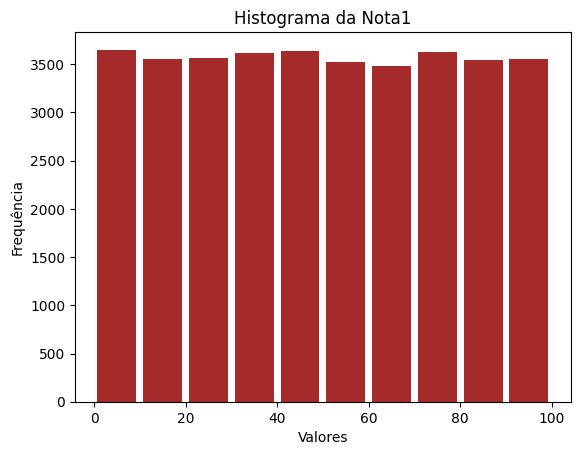

In [318]:
plt.title('Histograma da Nota1')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.hist(df.Nota1, rwidth=0.85, color = 'brown')
plt.show()

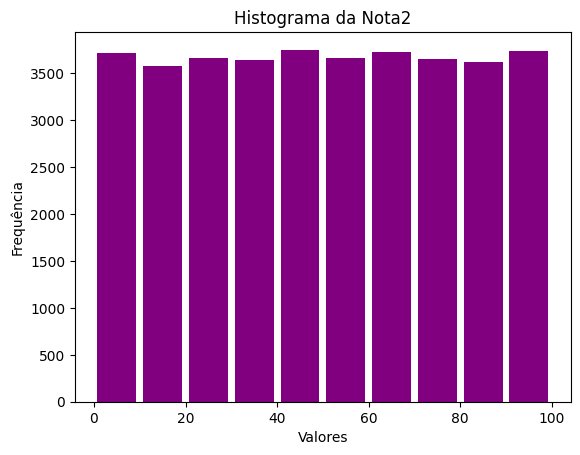

In [319]:
plt.title('Histograma da Nota2')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.hist(df.Nota2, rwidth=0.85, color='purple')
plt.show()

In [320]:
notas = ['Nota1', 'Nota2']
df[notas] = df[notas].fillna(df[notas].median())

In [321]:
df.isnull().sum()

id          0
Nome        0
Sexo        0
Nasc        0
Idade       0
Email       0
Lat_long    0
Job         0
Estado      0
Salario     0
Perfil      0
Ativo01     0
Ativo02     0
Ativo03     0
Ativo04     0
Ativo05     0
Ativo06     0
Ativo07     0
Nota1       0
Nota2       0
dtype: int64

### 7 - Manipulando os dados:

#### 7.1 Criandado coluna "Total" somando o valor de todos os ativos por investidor


In [322]:
df['Total']= df[ativos].sum(axis=1)

#### 7.2 Criandado coluna "Media" com a média das notas 1 e 2


In [323]:
df['Media'] = df[notas].mean(axis=1)

#### 7.3 Criandado coluna "Dominio" com apenas o domínio do email

In [324]:
df['Dominio'] = [ _[1] for _ in df['Email'].str.split('@')]

#### 7.4 Renomeando a coluna "Salário" para "Renda" e tratando a coluna como tipo numérica


In [325]:
df = df.rename(
    columns={
        'Salario': 'Renda'
        }
    )

In [326]:
df['Renda'] = df['Renda'].str.replace('$','')
df['Renda'] = df['Renda'].astype('float')


C:\Users\silva\AppData\Local\Temp\ipykernel_20664\3697943373.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Renda'] = df['Renda'].str.replace('$','')


#### 7.5 Renomeando os dados da coluna "Sexo" para Masculino e Feminino

In [327]:
def atualizacao_genero(genero):
  if genero == 'Fem':
    return f'Feminino'
  elif genero == 'Masc':
    return f'Masculino'

In [328]:
df['Sexo'] = list(map(atualizacao_genero, df['Sexo']))

#### 7.6 Transformar os dados da coluna Media em inteiro


In [329]:
df['Media'] = df['Media'].astype('int')

#### 7.7 Criando uma npva série chamada "NPS" onde o investidor é categorizado por sua média.

- Promotor se a média das notas é maior igual a 80
- Neutro se a média estiver entre 50 e 80
- Detrator se for abaixo de 50


In [330]:
def classificao_investidor(media):
  if media >= 80:
    return f'Promotor'
  elif media >= 50 and media < 80:
    return f'Neutro'
  else:
    return f'Detrator'


In [331]:
df['NPS'] = list(map(classificao_investidor,df['Media']))

#### 7.8 Trocando o formato da coluna Nascimento para DateTime

In [332]:
df['Nasc'] = pd.to_datetime(df['Nasc'])


### 8 - Calculando os seguintes dados:


#### 8.1 Calculo do total investido em cada Ativo

In [333]:
df[ativos].sum(axis=0)


Ativo01    3.275569e+07
Ativo02    1.680798e+08
Ativo03    1.023306e+08
Ativo04    4.071340e+08
Ativo05    1.720668e+08
Ativo06    4.462684e+07
Ativo07    1.937903e+07
dtype: float64

#### 8.2 O menor valor investido em cada ativo


In [334]:
filtro_ativo = df[ativos] > 0
df[ativos][filtro_ativo].min()


Ativo01     800.01
Ativo02    4500.05
Ativo03    2500.01
Ativo04    5000.81
Ativo05    4000.14
Ativo06    2000.04
Ativo07     462.93
dtype: float64

O filtro em que os valores ão maiores que 0 (zero) para as séries de ```Ativos``` serve para não cometermos um equívoco analítico. Uma vez que, no item ```6.2 - Tratando os dados faltantes (NaNs)``` preenchemos os não-investimentos dos ativos (ou dados faltantes) pelo valor 0.

#### 8.3 A média e desvio padrão de cada ativo


In [335]:
display(df[ativos].agg(['mean','std']))

,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07
mean,845.220878,4337.095701,2640.515840,10505.598580,4439.975773,1151.541631,500.052452
std,524.568525,1909.955896,1204.864694,9084.714705,2068.665605,1172.059182,9.998218


#### 8.4 A(s) idade(s) do(s) investidor(es) mais velho(s)


In [336]:
filtro_idade  = (df['Idade'] == df['Idade'].max() )
qtd_idade_max = df['Idade'][filtro_idade].count()
print(f"Existem {qtd_idade_max} investidores mais velhos, e sua idade é de: {df['Idade'].max()} anos")

Existem 774 investidores mais velhos, e sua idade é de: 51 anos


#### 8.5 Mediana da coluna Média

In [337]:
print(f"A Mediana da coluna Média é {df['Media'].describe()['50%']}")


A Mediana da coluna Média é 49.0


### 9 - Respondendo as perguntas abaixo:


#### 9.1 Quantos investidores são promotores?


In [338]:
qtd_promotor = df[ df['NPS'] == 'Promotor' ].shape[0]
print(f"Temos {qtd_promotor} investidores na categoria Promotor")


Temos 2703 investidores na categoria Promotor


#### 9.2 Quantos investidores são do sexo feminino?


In [339]:
qtd_feminino = df[ df['Sexo'] == 'Feminino' ].shape[0]
print(f"Temos {qtd_feminino} investidores do sexo Feminino")


Temos 19385 investidores do sexo Feminino


#### 9.3 Quantos investidores investiram mais de 16000 no Ativo04?


In [340]:
qtd_ativo04_16k = df[ df['Ativo04'] > 16000 ].shape[0]
print(f"Temos {qtd_ativo04_16k} investidores com mais de R$ 16.000,00 no Ativo 04")


Temos 10689 investidores com mais de R$ 16.000,00 no Ativo 04


#### 9.4 Quantos investidores investiram mais de 16000 no Ativo04 e menos de 5000 no Ativo05?


In [341]:
qtd_ativo04_ativo05 = df[ (df['Ativo04'] > 16000) & 
                          (df['Ativo05'] < 5000) ].shape[0]
print(f'Temos {qtd_ativo04_ativo05} investidores com mais de R$ 16.000,00 no Ativo 04 e menos de R$ 5.000,00 no Ativo 05')


Temos 5374 investidores com mais de R$ 16.000,00 no Ativo 04 e menos de R$ 5.000,00 no Ativo 05


#### 9.5 Quantos investidores do sexo feminino tem mais de 25 anos e investiu menos de 10000?

In [342]:
qtd_fem_25_10k = df[ (df['Sexo'] == 'Feminino') &
                     (df['Idade'] > 25) & 
                     (df['Total'] < 10000) ].shape[0]

print(
    f'Temos {qtd_fem_25_10k} investidores do sexo Feminino com mais de 25 anos que investiram menos de R$10.000,00')


Temos 442 investidores do sexo Feminino com mais de 25 anos que investiram menos de R$10.000,00


#### Bonus: por que esse dado seria importante para a estratégia da nossa empresa?


In [343]:
perfil_1 =  ((df['Sexo'] == 'Feminino') & 
            (df['Idade'] > 25) & 
            (df['Total'] < 10000))
            
perfil_2 =  ((df['Sexo'] == 'Feminino') & 
            (df['Idade'] > 25) & 
            (df['Total'] > 10000))


In [344]:
display(df['Renda'][perfil_1].describe())


count      442.000000
mean     12971.145204
std      25251.608018
min          0.040000
25%         21.727500
50%        565.285000
75%       7925.700000
max      99854.690000
Name: Renda, dtype: float64

In [345]:
display(df['Renda'][perfil_2].describe())

count     9232.000000
mean     12042.401213
std      24119.542989
min          0.000000
25%         32.970000
50%        566.250000
75%       7832.357500
max      99991.070000
Name: Renda, dtype: float64

In [346]:
df[perfil_1].describe()['Total']

count     442.00000
mean     8230.08448
std      1741.19164
min       518.95000
25%      7301.16750
50%      8868.25500
75%      9558.41250
max      9999.51000
Name: Total, dtype: float64

In [347]:
df[perfil_2].describe()['Total']


count     9232.000000
mean     25105.603237
std       9190.115749
min      10002.590000
25%      17003.025000
50%      24519.925000
75%      31293.630000
max      61130.830000
Name: Total, dtype: float64

### Perfil 1:

- Mulheres
- Acima de 25 anos
- Total investido abaixo de R$ 10.000,00

### Perfil 2:

- Mulheres
- Acima de 25 anos
- Total investido acima de R$ 10.000,00


Notamos em uma análise descritiva que os investidores do Perfil 1 conta com 442 pessoas da qual sua média de renda é em torno de R$ 12.971,15. E extendendo a análise para os invesidores do Perfil 2, da qual conta com uma população de 9.232 pessoas, a renda média é de R$ 12.042,40. Isso significa que os investidores do Perfil 1 tem em média 7% a mais renda do que os investidores do Perfil 2, contudo o total investido por esse em comparação ao segundo é de apenas 32,78% do seu montante, dessa forma, há uma grande margem para prospecção desse perfil.

#### 9.6 Quantos investidores tem em cada estado (dica: use groupby)


In [348]:
df[['Estado', 'id']].groupby('Estado').size()


Estado
AC    1435
AL    1376
AM    1495
AP    1438
BA    1484
CE    1465
DF    1470
ES    1472
GO    1394
MA    1454
MG    1407
MS    1436
MT    1390
PA    1421
PB    1405
PE    1477
PI    1503
PR    1371
RJ    1466
RN    1472
RO    1440
RR    1495
RS    1393
SC    1430
SE    1319
SP    1464
TO    1382
dtype: int64

#### 9.7 Qual é a soma do total investido por cada estado?


In [349]:
df[['Estado', 'Total']].groupby('Estado').sum()

,Total
Estado,
AC,35362505.80
AL,33763479.45
AM,37036424.81
AP,34996432.12
BA,36188507.51
CE,35959807.36
DF,36277409.37
ES,36112618.12
GO,34234860.26


#### 9.8 Como os investidores se distribuem em promotores, detratores e neutros?


In [350]:
df.groupby('NPS').size()


NPS
Detrator    19622
Neutro      16429
Promotor     2703
dtype: int64

#### 9.9 Qual é a média do total investido por promotores, detratores e neutros?


In [351]:
df[['Total', 'NPS']].groupby('NPS').mean()


,Total
NPS,
Detrator,24389.772914
Neutro,24452.010268
Promotor,24444.880596


### 10 - Realizando o carregamento do Database

In [352]:
df.to_csv("dataset\DataBase.csv", index=None)